In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


%matplotlib inline

## Thông tin dữ liệu

The widely used Statlog German credit data ([Web Link]), as of November 2019, suffers from severe errors in the coding information and does not come with any background information. The 'South German Credit' data provide a correction and some background information, based on the Open Data LMU (2010) representation of the same data and several other German language resources.

Source:
- Ulrike Grömping
- Beuth University of Applied Sciences Berlin
- Website with contact information: https://prof.beuth-hochschule.de/groemping/

## Thông tin thuộc tính

This section contains a brief description for each attribute. Details on attribute coding can be obtained from the accompanying R code for reading the data or the accompanying code table, as well as from Groemping (2019) (listed under 'Relevant Papers').

1) Column name: laufkont
- Variable name: status
- Content: status of the debtor's checking account with the bank (categorical); 1 = no checking account ; 2 = … < 0 DM; 3 = 0 <= … < 200 DM; 4 : … >= 200 DM / salary for at least 1 year

2) Column name: laufzeit
- Variable name: duration
- Content: credit duration in months (quantitative); 

3) Column name: moral
- Variable name: credit_history
- Content: history of compliance with previous or concurrent credit contracts (categorical); (0: delay in paying off in the past, 1: critical account/other credits elsewhere, 2: no credits taken/all credits paid back duly, 3: existing credits paid back duly till now; 4: all credits at this bank paid back duly)

4) Column name: verw
- Variable name: purpose
- Content: purpose for which the credit is needed (categorical); (0: others, 1: car (new), 2: car (used), 3: furniture/equipment, 4: radio/television, 5: domestic appliances, 6: repairs, 7: education, 8: vacation, 9: retraining, 10: business)

5) Column name: hoehe
- Variable name: amount
- Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

6) Column name: sparkont
- Variable name: savings
- Content: debtor's savings (categorical); (1: unknown/no savings account, 2: … < 100 DM, 3: 100 <= … < 500 DM, 4: 500 <= … < 1000 DM, 5: … >= 1000 DM)

7) Column name: beszeit
- Variable name: employment_duration
- Content: duration of debtor's employment with current employer (ordinal; discretized quantitative); (1: unemployed, 2: < 1 yr, 3: 1 <= … < 4 yrs, 4: 4 <= … < 7 yrs, 5: >= 7 yrs )

8) Column name: rate
- Variable name: installment_rate
- Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative); (1: >= 35, 2: 25 <= … < 35, 3: 20 <= … < 25, 4: < 20)

9) Column name: famges
- Variable name: personal_status_sex
- Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories; (1:male: divorced/separated, 2:female:non-single or male:single, 3:male:married/widowed, 4:female:single)

10) Column name: buerge
- Variable name: other_debtors
- Content: Is there another debtor or a guarantor for the credit? (categorical); (1: none, 2: co-applicant, 3: guarantor )

11) Column name: wohnzeit
- Variable name: present_residence
- Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative); (1: < 1 yr ,2: 1 <= … < 4 yrs, 3: 4 <= … < 7 yrs, 4: >= 7 yrs)

12) Column name: verm
- Variable name: property
- ontent: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal); (1: unknown / no property, 2: car or other, 3: building soc. savings agr./life insurance, 4: real estate )

13) Column name: alter
- Variable name: age
- Content: age in years (quantitative); 

14) Column name: weitkred
- Variable name: other_installment_plans
- Content: installment plans from providers other than the credit-giving bank (categorical); (1: bank, 2: stores, 3: none )

15) Column name: wohn
- Variable name: housing
- Content: type of housing the debtor lives in (categorical); (1: for free, 2: rent, 3: own )

16) Column name: bishkred
- Variable name: number_credits
- Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.; (1: 1, 2: 2-3, 3: 4-5, 4: >= 6)

17) Column name: beruf
- Variable name: job
- Content: quality of debtor's job (ordinal); (1: unemployed/unskilled - non-resident; 2: unskilled - resident; 3: skilled employee/official; 4: manager/self-empl./highly qualif. employee)

18) Column name: pers
- Variable name: people_liable
- Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative); (1: 3 or more, 2: 0 to 2 )

19) Column name: telef
- Variable name: telephone
- Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s); (1: no, 2: yes (under customer name))

20) Column name: gastarb
- Variable name: foreign_worker
- Content: Is the debtor a foreign worker? (binary); (1: yes, 2: no)

21) Column name: kredit
- Variable name: credit_risk
- Content: Has the credit contract been complied with (good) or not (bad) ? (binary) 

## Khám phá dữ liệu

### Đọc dữ liệu từ file

In [105]:
# YOUR CODE HERE
#raise NotImplementedError
df = pd.read_csv('data/SouthGermanCredit.asc', delimiter=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [106]:
# YOUR CODE HERE
#raise NotImplementedError
shape = df.shape

In [107]:
# TEST
assert shape == (1000, 21)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

### Dữ liệu có các dòng bị lặp không?

In [108]:
# YOUR CODE HERE
# raise NotImplementedError
num_duplicated_rows = df.duplicated().sum()

In [109]:
# TEST
assert num_duplicated_rows == 0

### Mỗi cột có ý nghĩa gì?

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [110]:
# YOUR CODE HERE
# raise NotImplementedError
dtypes = df.dtypes

In [111]:
# TEST
int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert int_cols == {'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'}

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [112]:
# YOUR CODE HERE
# raise NotImplementedError
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def lower_quartile(s):
    return s.describe().loc['25%']

def upper_quartile(s):
    return s.describe().loc['75%']

def median(s):
    return s.describe().loc['50%']
num_col_info_df = df.loc[:,int_cols]

C:\Users\TNT\AppData\Local\Temp\ipykernel_4284\4234859847.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  num_col_info_df = df.loc[:,int_cols]


In [113]:
num_col_info_df = num_col_info_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

In [114]:
num_col_info_df

,kredit,moral,verw,buerge,pers,wohnzeit,beruf,laufzeit,telef,gastarb,...,beszeit,weitkred,rate,sparkont,famges,verm,alter,laufkont,bishkred,wohn
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,19.0,1.0,1.0,1.0
lower_quartile,0.0,2.0,1.0,1.0,2.0,2.0,3.0,12.0,1.0,2.0,...,3.0,3.0,2.0,1.0,2.0,1.0,27.0,1.0,1.0,2.0
median,1.0,2.0,2.0,1.0,2.0,3.0,3.0,18.0,1.0,2.0,...,3.0,3.0,3.0,1.0,3.0,2.0,33.0,2.0,1.0,2.0
upper_quartile,1.0,4.0,3.0,1.0,2.0,4.0,3.0,24.0,2.0,2.0,...,5.0,3.0,4.0,3.0,3.0,3.0,42.0,4.0,2.0,2.0
max,1.0,4.0,10.0,3.0,2.0,4.0,4.0,72.0,2.0,2.0,...,5.0,3.0,4.0,5.0,4.0,4.0,75.0,4.0,4.0,3.0


### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

## Tiền xử lý

In [115]:
## Chỉnh sửa tên cột cho dễ hiểu
rename_lst = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

df.columns = rename_lst

In [116]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Dữ liệu có cân bằng hay không?

Câu hỏi 1: Hãy trực quan hóa với trường dữ liệu `credit_risk` và khi gom nhóm với trường `foreign_worker`, sau đó cho nhận xét dữ liệu có bị mất cân bằng hay không?

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

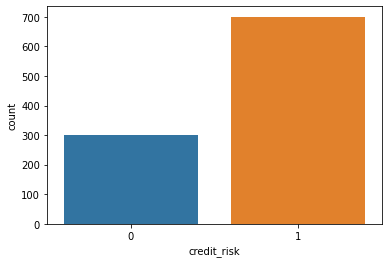

In [117]:
# YOUR CODE HERE
# raise NotImplementedError
sns.countplot(x=df["credit_risk"])

Nhận xét: mất cân bằng

<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

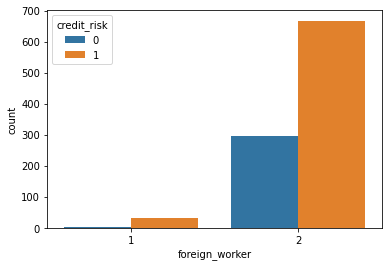

In [118]:
sns.countplot(data=df, x="foreign_worker", hue="credit_risk")

Nhận xét: mất cân bằng

Câu 2: Tính toán và trực quan hóa mối tương quan giữa các yếu tố ảnh hưởng đến nhãn `credit_risk` thông qua heatmap.

In [119]:
# YOUR CODE HERE
#raise NotImplementedError

corr = df.corr(method='spearman')['credit_risk']
corr

status                     0.347944
duration                  -0.205685
credit_history             0.221606
purpose                    0.020900
amount                    -0.087083
savings                    0.175198
employment_duration        0.119806
installment_rate          -0.073690
personal_status_sex        0.090510
other_debtors              0.003197
present_residence         -0.002553
property                  -0.140851
age                        0.113238
other_installment_plans    0.113046
housing                    0.022808
number_credits             0.047316
job                       -0.035330
people_liable             -0.003015
telephone                  0.036466
foreign_worker            -0.082079
credit_risk                1.000000
Name: credit_risk, dtype: float64

<AxesSubplot:>

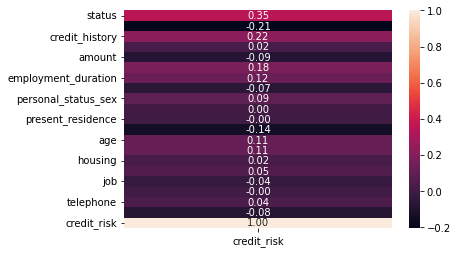

In [120]:
sns.heatmap(pd.DataFrame(corr), annot=True, fmt=".2f")

Nhận xét: status có độ tương quan cao nhất với credit_risk (~0.35), job có độ tương quan thấp nhất so với credit_risk (gần như 0)

**Câu 3**: Sử dụng mô hình để tính toán ra những đặc trưng quan trọng? Gợi ý: Coefficients as Feature Importance; Decision Tree Feature Importance; và Permutation Feature Importance.

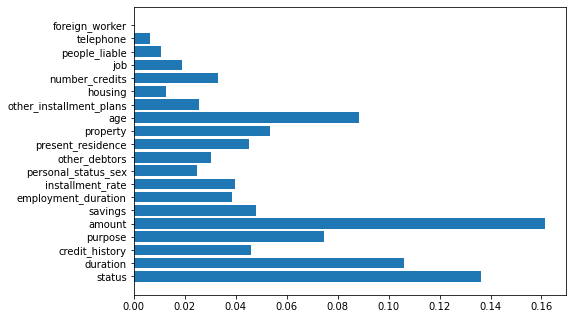

In [121]:
# YOUR CODE HERE
#raise NotImplementedError
X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

model = DecisionTreeClassifier()

model.fit(X, y)

importance = model.feature_importances_

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cates = df.iloc[:, :-1].columns.to_list()
ax.barh(cates,importance)
plt.show()

Nhận xét: amount là feature tốt nhất để dự đoán credit_risk, trong khi đó people_liable là feature tệ nhất để dự đoán mô hình

**Câu 4**: Trực quan histogram amount dựa trên credit risk và rút ra nhận xét.

(array([38., 58., 36., 31., 19., 14., 19., 11.,  3., 11., 10.,  7.,  8.,
         4.,  4.,  3.,  2.,  2.,  4.,  3.,  4.,  0.,  1.,  4.,  1.,  2.,
         0.,  0.,  0.,  1.]),
 array([  433. ,  1032.7,  1632.4,  2232.1,  2831.8,  3431.5,  4031.2,
         4630.9,  5230.6,  5830.3,  6430. ,  7029.7,  7629.4,  8229.1,
         8828.8,  9428.5, 10028.2, 10627.9, 11227.6, 11827.3, 12427. ,
        13026.7, 13626.4, 14226.1, 14825.8, 15425.5, 16025.2, 16624.9,
        17224.6, 17824.3, 18424. ]),
 <BarContainer object of 30 artists>)

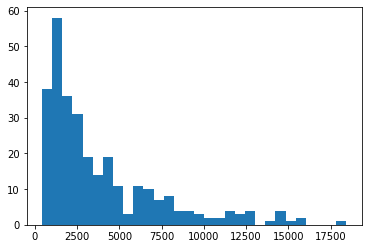

In [122]:
# YOUR CODE HERE
# raise NotImplementedError
plt.hist(df[df.credit_risk==0]['amount'], bins=30)

(array([ 48., 101., 125.,  92.,  71.,  51.,  61.,  21.,  20.,  13.,  16.,
         15.,  11.,  13.,  10.,   5.,   5.,   5.,   1.,   5.,   3.,   0.,
          3.,   0.,   1.,   1.,   1.,   0.,   0.,   2.]),
 array([  250.        ,   770.23333333,  1290.46666667,  1810.7       ,
         2330.93333333,  2851.16666667,  3371.4       ,  3891.63333333,
         4411.86666667,  4932.1       ,  5452.33333333,  5972.56666667,
         6492.8       ,  7013.03333333,  7533.26666667,  8053.5       ,
         8573.73333333,  9093.96666667,  9614.2       , 10134.43333333,
        10654.66666667, 11174.9       , 11695.13333333, 12215.36666667,
        12735.6       , 13255.83333333, 13776.06666667, 14296.3       ,
        14816.53333333, 15336.76666667, 15857.        ]),
 <BarContainer object of 30 artists>)

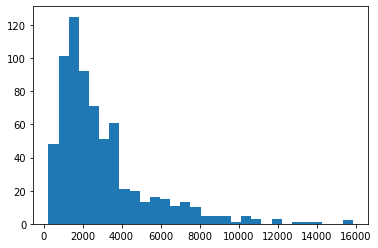

In [123]:
# YOUR CODE HERE
plt.hist(df[df.credit_risk==1]['amount'], bins=30)

Nhận xét: 2 hình trên khá giống nhau (khi credit risk mang giá trị khác nhau) nên thuộc tính amount không ảnh hưởng nhiều bởi credit risk

## Tiền xử lý dữ liệu

Ta nhận thấy: age, amount và duration có giá trị tương đối lớn so với phần còn lại. Ta sẽ tiền xử lý những đặc trưng này thông qua logarithm transformation.

In [124]:
cp_df = df.copy()

In [125]:
# YOUR CODE HERE
# raise NotImplementedError
cp_df[['age','amount','duration']] = np.log(cp_df[['age','amount','duration']])

In [126]:
# TEST
cp_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,2.890372,4,2,6.955593,1,2,4,2,1,...,2,3.044522,3,1,1,3,2,1,2,1
1,1,2.197225,4,0,7.937017,1,3,2,3,1,...,1,3.583519,3,1,2,3,1,1,2,1
2,2,2.484907,2,9,6.734592,2,4,2,2,1,...,1,3.135494,3,1,1,2,2,1,2,1
3,1,2.484907,4,0,7.660114,1,3,3,3,1,...,1,3.663562,3,1,2,2,1,1,1,1
4,1,2.484907,4,0,7.682943,1,3,4,3,1,...,2,3.637586,1,2,2,2,2,1,1,1


## Phân chia tập train và tập test

Các bạn thực hiện việc phân chia tập train, tập test cho việc huấn luyện mô hình. Kích thước tập test là 30%, random state tùy thích.

In [127]:
# YOUR CODE HERE
X = cp_df.drop('credit_risk',axis=1)
y = cp_df['credit_risk']
#raise NotImplementedError
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3)

In [128]:
# TEST
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

## Mô hình phân lớp

Các mô hình phân lớp tuyến tính
- sklearn.linear_model.LogisticRegression
- sklearn.linear_model.SGDClassifier

Các mô hình phân lớp ensemble
- sklearn.ensemble.RandomForestClassifier
- sklearn.ensemble.GradientBoostingClassifier
- sklearn.ensemble.AdaBoostClassifier
- sklearn.ensemble.BaggingClassifier

Các mô hình dựa trên cây
- sklearn.tree.DecisionTreeClassifier

Các mô hình khác.
- Support Vector Machine: sklearn.svm
- K-Nearest Neighbors: sklearn.neighbors.KNeighborsClassifier
- Naive Bayes: sklearn.naive_bayes.GaussianNB
- Linear Discriminant Analysis: sklearn.discriminant_analysis.LinearDiscriminantAnalysis

Chọn 5 trong số các mô hình sau. Sử dụng RepeatedStratifiedKFold đánh giá trên tập train. Sau đó dùng Random search hoặc Grid search để tìm best hyperparameter và đánh giá trên tập test với các siêu tham số tốt nhất vừa tìm được.

In [97]:
#raise NotImplementedError
logis_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'dual' :[True,False], 'fit_intercept': [True, False] , 'intercept_scaling' : [1,0.5,2]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
logis_grid = GridSearchCV( LogisticRegression(),param_grid = logis_param_grid,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          verbose=0)


SGD_param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 
            'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'shuffle' :[True,False], 
            'warm_start' :[True,False], 
            'fit_intercept': [True, False]}
SGD_grid = GridSearchCV( SGDClassifier(),param_grid = SGD_param_grid,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          verbose=0) 

tree_param_grid = {'criterion' :['gini', 'entropy', 'log_loss'],'splitter':['best', 'random'],
            'max_depth': [3,5] ,'min_samples_split' : [3,5],'min_samples_leaf':[1,2],
            'min_weight_fraction_leaf':[0,0.4],'max_features':['auto', 'sqrt', 'log2']
}
tree_grid = GridSearchCV( DecisionTreeClassifier(),param_grid = tree_param_grid,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          verbose=0) 
                          
SVC_param_grid = { 'C': [0.1,1, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid'] }
SVC_grid = GridSearchCV( SVC() ,param_grid = SVC_param_grid,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          verbose=0) 

random_fore_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 
            'max_depth' : [2,3],
            'max_features' :[None, 'sqrt', 'log2'], 
            'warm_start' :[True,False], 
            'bootstrap': [True, False]}

random_fore = GridSearchCV( RandomForestClassifier(),param_grid = random_fore_grid,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          verbose=0) 

random_fore.fit(X_train,y_train)
SVC_grid.fit(X_train,y_train)
tree_grid.fit(X_train,y_train)
logis_grid.fit(X_train,y_train)
SGD_grid.fit(X_train,y_train)

c:\Users\TNT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\TNT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\TNT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\TNT\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=SGDClassifier(),
             param_grid={'fit_intercept': [True, False],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'shuffle': [True, False],
                         'warm_start': [True, False]},
             scoring='neg_mean_squared_error')

In [100]:
print('random_fore')
print(classification_report(random_fore.predict(X_test),y_test))

random_fore
              precision    recall  f1-score   support

           0       0.26      0.56      0.35        41
           1       0.91      0.75      0.82       259

    accuracy                           0.72       300
   macro avg       0.59      0.65      0.59       300
weighted avg       0.83      0.72      0.76       300



In [101]:

print('SVC')
print(classification_report(SVC_grid.predict(X_test), y_test))

SVC
              precision    recall  f1-score   support

           0       0.29      0.63      0.40        41
           1       0.93      0.76      0.83       259

    accuracy                           0.74       300
   macro avg       0.61      0.70      0.62       300
weighted avg       0.84      0.74      0.77       300



In [102]:
print('TREE')
print(classification_report(tree_grid.predict(X_test), y_test))

TREE
              precision    recall  f1-score   support

           0       0.08      0.70      0.14        10
           1       0.99      0.72      0.83       290

    accuracy                           0.72       300
   macro avg       0.53      0.71      0.49       300
weighted avg       0.96      0.72      0.81       300



In [103]:
print('Logistic')
print(classification_report(logis_grid.predict(X_test), y_test))

Logistic
              precision    recall  f1-score   support

           0       0.45      0.67      0.54        60
           1       0.91      0.80      0.85       240

    accuracy                           0.77       300
   macro avg       0.68      0.73      0.69       300
weighted avg       0.81      0.77      0.78       300



In [104]:
print('SGD')
print(classification_report(SGD_grid.predict(X_test), y_test))

SGD
              precision    recall  f1-score   support

           0       0.35      0.70      0.47        44
           1       0.94      0.77      0.85       256

    accuracy                           0.76       300
   macro avg       0.64      0.74      0.66       300
weighted avg       0.85      0.76      0.79       300



## Xử lý mất cân bằng dữ liệu và xây dựng mô hình phân lớp

Bằng cách sử dụng thư viện [imblearn](https://imbalanced-learn.org/stable/) để xử lý mất cân bằng dữ liệu với chiến lược Oversampling hoặc Undersampling, sau đó chọn 5 trong số các mô hình trên cho việc hay dựng mô hình phân lớp. Sử dụng RepeatedStratifiedKFold đánh giá trên tập train. Sau đó dùng Random search hoặc Grid search để tìm best hyperparameter và đánh giá trên tập test với các siêu tham số tốt nhất vừa tìm được.

In [ ]:
raise NotImplementedError

## Rút ra nhận xét khi làm việc với dữ liệu mất cân bằng